## Support Vector Clustering

Clustering algorithms can be parametric or non-parametric. Clustering can be done in many ways like a parametric model, as in the k-means algorithm, or by grouping points according to some distance or similarity measure as in hierarchical clustering algorithm or density estimation. These algorithms look limited in power as they have certain limitations. 

SVC is a nonparametric clustering algorithm that does not make any assumption on the number or shape of the clusters in the data. It works best for low-dimensional data. if the data is high-dimensional, a preprocessing step, e.g. principal component analysis, is usually required. 

In Support Vector Clustering (SVC) algorithm data points are mapped from data space to a high dimensional feature space using a Gaussian(normal distribution) kernel. In feature space we look for the smallest sphere that encloses the image of the data using the Support Vector Domain Description algorithm. This sphere is mapped back to data space, where it forms a set of contours which enclose the data points. These contours are interpreted as cluster boundaries. Points enclosed by each separate contour are associated with the same cluster. 

SVC uses Support Vector Domain Description (SVDD) to delineate the region in data space where the input examples are concentrated. It looks for the smallest enclosing sphere in the feature space defined by the kernel function. While in feature space the data is described by a sphere, when mapped back to data-space the sphere is transformed into a set of non-linear contours that enclose the data. 

The boundaries generated by SVDD become increasingly non-linear as the parameter $\gamma$ which governs the width of the Gaussian, is increased as shown below. 

<img src="../images/gamma.png">

As the value of γ is increased the SVDD boundary fits the data more tightly, and at several values of $\gamma$ the enclosing boundary splits, forming an increasing number of components (clusters). The so-called support vectors are the data points that are on the boundary.
<img src="../images/ignore_outliers.png">

SVC can deal with outliers by employing a soft margin constant that allows the sphere in feature space not to enclose all points. For large values of this parameter, we can also deal with overlapping clusters. 

We will use SvcR package to perform Support Vector Clustering. The main function is the findSvcModel function which computes a clustering model and returns it as an R object. 

Parameters of findSvcModel are listed below:

* data.frame means data.frame parameter in standard use or means data.frame in loadMat use or means DatMat in Eval use, a matrix given as unic argument


* MetOpt, optimization control parameter : optimStoch (stochastic way of optimization) or optimQuad (quadratic way of optimization)


* MetLab, labelling method: gridLabeling (grid labelling) or mstLabeling (mst labelling) or knnLabeling (knn labelling)


* KernChoice, kernel choice: KernLinear (Euclidian) or KernGaussian (RBF) or KernGaussianDist (Exponential) or KernDist (Matrix data as Kernel value)


* Nu, nu parameter


* q, q parameter


* k, k nearest neigbours for grid


* G, grid size


*  Cx, x component to display (1 for 1st attribute)


* Cy, y component to display (2 for 2nd attribute)

In [1]:
# svcR package to model a support vector cluster
library("svcR")

# Load inbuilt iris dataset using data() command
data("iris")

# findSvcMOdel() function will build a svc model. The parameters are described above. 
retA <- findSvcModel(iris, MetOpt = "optimStoch", MetLab = "gridLabeling",
    KernChoice = "KernGaussian", Nu = 0.5, q = 40, K = 4,
    G = 5, Cx = 0, Cy = 0)

Loading required package: spdep
Loading required package: sp
Loading required package: Matrix
Loading required package: quadprog
Loading required package: ade4

Attaching package: ‘ade4’

The following object is masked from ‘package:spdep’:

    mstree

Loading required package: amap


 loading matrix... 		 ok 
 two-feature selection... 	 ok 
 min max calculation... 	 ok 
 kernel matrix... 		 ok 
 lagrange coefficients... 	 ok 
 radius computation... 		 ok 
			 radiusC  0.9870425 	 smallr  0.09264743 
 grid labeling... 
		 grid clustering... 	 ok 
				 NbCluster  2 
		 match grid... 		 ok 
[1] "time consuming"
   user  system elapsed 
  0.014   0.002   0.016 


CLUSTER ID  	 SIZE 
isolated 	 0 
   1 		 50 
   2 		 100 
			 most discriminant averaged attributes per cluster 
[1] "Petal.Length" "Petal.Width" 
cluster  1    
           Mean: 	1.462 	0.246 	
           1st Qu.: 	1.4 	0.2 	
           3st Qu.: 	1.575 	0.3 	
           Min: 	

Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”

1 	0.1 	

Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”


           Max: 	

Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”

1.9 	0.6 	

Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”


           Median: 	1.5 	0.2 	
          
cluster  2    
           Mean: 	4.906 	1.676 	
           1st Qu.: 	4.375 	1.3 	
           3st Qu.: 	5.525 	2 	
           Min: 	

Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”

3 	1 	

Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”


           Max: 	

Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”

6.9 	2.5 	

Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”


           Median: 	4.9 	1.6 	
          


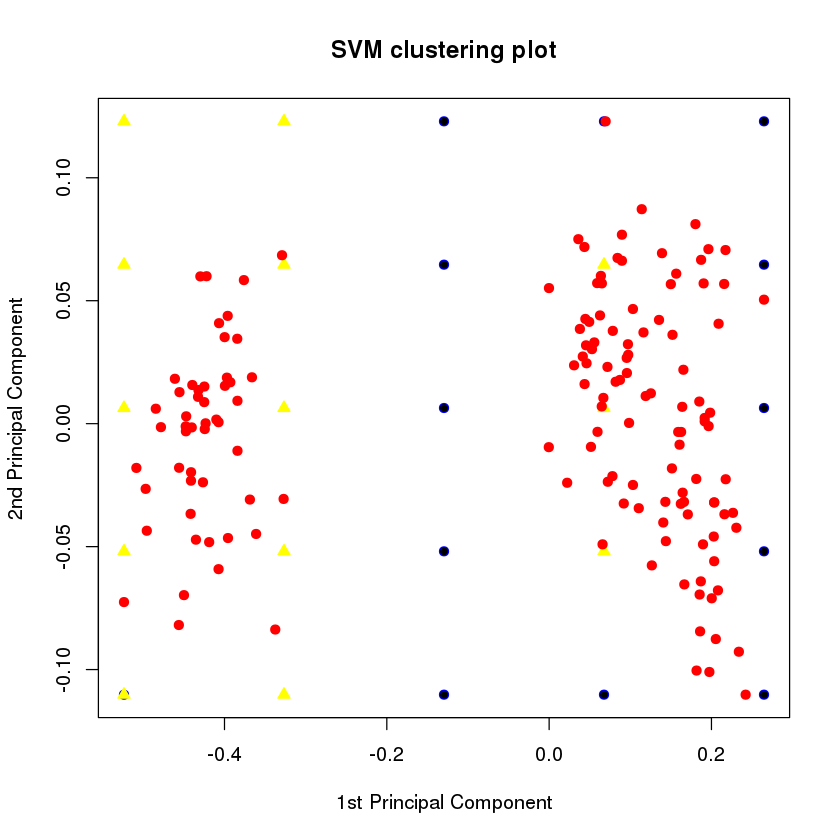

In [2]:
# Plot the clusters of data points
plot(retA)
findSvcModel.summary(retA)

From the above plot for Iris data, classes 2 and 3 are not well separated. So the method can catch well class 1 observations and from time to time a "bridge" occurs between class 2 and 3 that links them to form one cluster.

In [3]:
glass_data = read.csv("../../../datasets/glass/glass.txt",header=FALSE,sep=',')
header = c("Id", "Refractive_Index","Sodium","Magnesium","Aluminium","Silicon","Potassium","Calcium","Barium","Iron","Type")
names(glass_data)=header
head(glass_data)

Id,Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


In [4]:
retB <- findSvcModel(glass_data, MetOpt = "optimStoch", MetLab = "gridLabeling",
    KernChoice = "KernGaussian", Nu = 0.5, q = 40, K = 1,
    G = 5, Cx = 0, Cy = 0)

 loading matrix... 		 ok 
 two-feature selection... 	 ok 
 min max calculation... 	 ok 
 kernel matrix... 		 ok 
 lagrange coefficients... 	 ok 
 radius computation... 		 ok 
			 radiusC  1.019934 	 smallr  0.03460381 
 grid labeling... 
		 grid clustering... 	 ok 
				 NbCluster  1 
		 match grid... 		 ok 
[1] "time consuming"
   user  system elapsed 
  0.037   0.002   0.039 


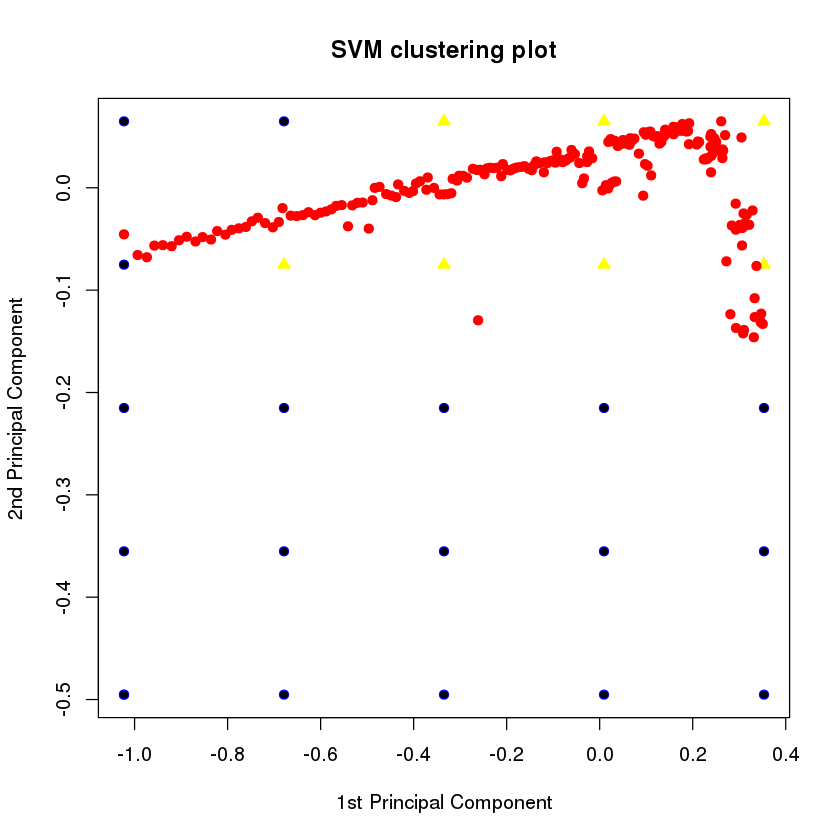

In [5]:
plot(retB)

In [6]:
findSvcModel.summary(retB)

CLUSTER ID  	 SIZE 
isolated 	 3 
   1 		 211 
			 most discriminant averaged attributes per cluster 
character(0)
cluster  1    
           Mean: 	
           1st Qu.: 	
           3st Qu.: 	
           Min: 	

Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”Warning message in min(MatriceCluster[, j]):
“no non-missing arguments to min; returning Inf”Warning message in min(MatriceCluster[, j]):
“no non-missing arguments


           Max: 	

Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”Warning message in max(MatriceCluster[, j]):
“no non-missing arguments to max; returning -Inf”Warning message in max(MatriceCluster[, j]):
“no non-missing


           Median: 	
          


K-means clustering with 6 clusters of sizes 35, 36, 35, 36, 36, 36

Cluster means:
     Id Refractive_Index   Sodium Magnesium Aluminium  Silicon Potassium
1  18.0         1.517759 13.12343 3.6008571  1.275714 72.85400 0.5197143
2  88.5         1.517292 13.12444 3.2922222  1.476111 72.74000 0.5586111
3  53.0         1.519678 13.36114 3.5040000  1.052000 72.38429 0.3751429
4 124.5         1.520106 13.12000 2.6613889  1.338333 72.43167 0.4708333
5 160.5         1.518293 13.18528 2.4702778  1.536389 72.44556 0.7933333
6 196.5         1.517085 14.52361 0.6266667  1.975278 73.04833 0.2619444
   Calcium      Barium       Iron     Type
1 8.449714 0.002571429 0.04857143 1.000000
2 8.554722 0.006944444 0.06722222 2.000000
3 9.144857 0.022857143 0.06542857 1.000000
4 9.659167 0.097500000 0.07777778 2.000000
5 9.282222 0.073611111 0.07222222 3.777778
6 8.642222 0.837777778 0.01083333 6.805556

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
 [38]

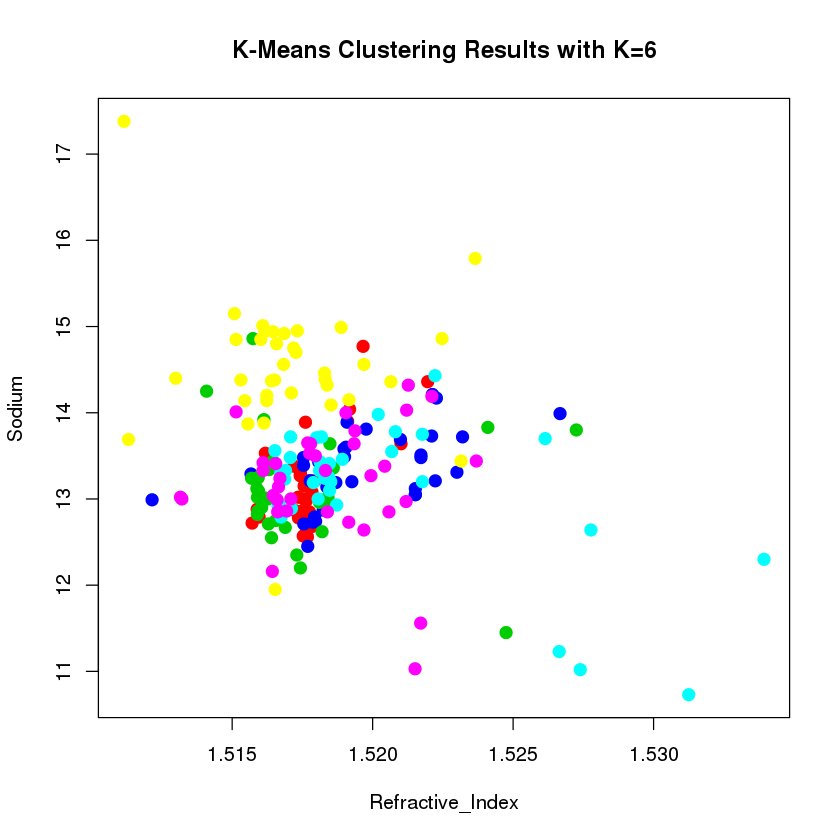

In [7]:
# Apply k-means cluster on the glass_data to compare with the results of SVC
km.fit = kmeans(glass_data,6,nstart = 20)

# Display the statistics of k-means cluster model.
km.fit
# plot the clusters of data points formed by k-means clustering model.
plot(glass_data[,2:3], col=(km.fit$cluster+1), main="K-Means Clustering Results with K=6", pch =20, cex =2)

In [9]:
# Use the multishapes dataset in factoextra package for clustering using svc
data("multishapes", package = "factoextra")
# multishapes has 3 columns x,y,shape. we will cluster the observations using just the x and y values. so create a dataframe 
# called df with first two columns x and y
df <- multishapes[, 1:2]

In [10]:
# Apply the clusting on the dataframe df
retC <- findSvcModel(df, MetOpt = "optimStoch", MetLab = "gridLabeling",
    KernChoice = "KernGaussian", Nu = 0.5, q = 40, K = 1,
    G = 5, Cx = 0, Cy = 0)

 loading matrix... 		 ok 
 two-feature selection... 	 ok 
 min max calculation... 	 ok 
 kernel matrix... 		 ok 
 lagrange coefficients... 	 ok 
 radius computation... 		 ok 
			 radiusC  0.9810621 	 smallr  0.07866412 
 grid labeling... 
		 grid clustering... 	 ok 
				 NbCluster  1 
		 match grid... 		 ok 
[1] "time consuming"
   user  system elapsed 
  0.658   0.026   0.684 


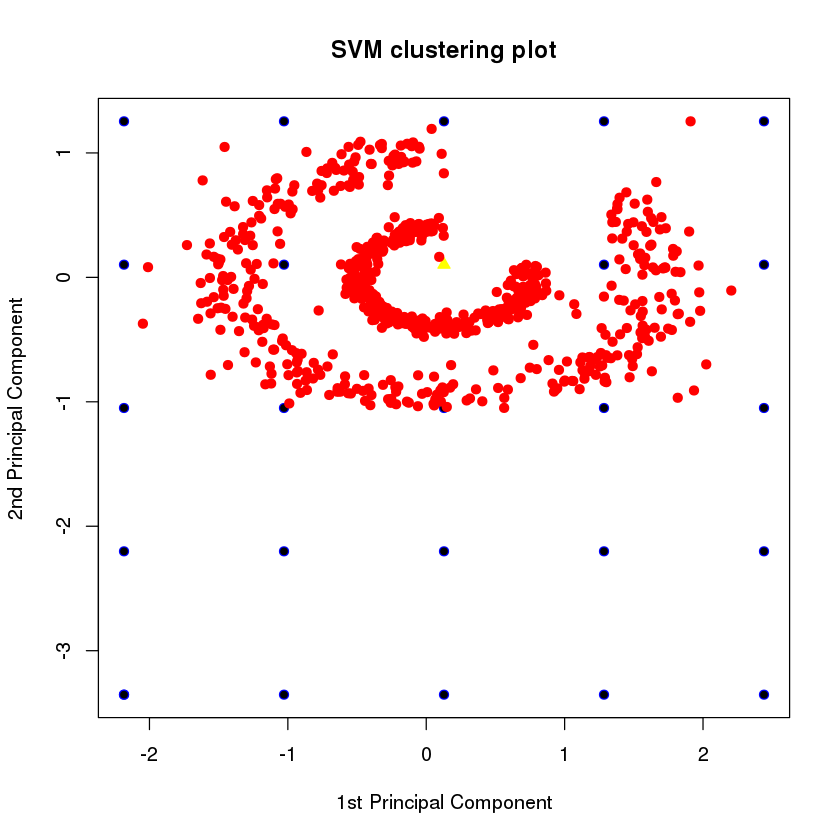

In [11]:
# Plot the clusters of observations created for df dataframe using svc
plot(retC)